<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Sep/Ejercicio-09-09-2023/Ejercicio_09_09_2023(en_clase).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image
from scipy.stats import f_oneway

warnings.filterwarnings('ignore')

# Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
file_path = "/content/drive/MyDrive/Machine-Learning-2023/CarPrice_Assignment.csv"
df = pd.read_csv(file_path)


In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#Separate Numerical and  Categorical data

In [5]:
# Seleccionar columnas de interés
columns_of_interest = df.columns[:26]
df = df[columns_of_interest]

# Obtener información sobre los tipos de datos de cada columna
info_tipos_datos = df.dtypes

# Crear listas para almacenar las columnas numéricas y categóricas
columnas_numericas = [columna for columna, tipo in info_tipos_datos.items() if pd.api.types.is_numeric_dtype(tipo)]
columnas_categoricas = [columna for columna, tipo in info_tipos_datos.items() if not pd.api.types.is_numeric_dtype(tipo)]

print("Columnas Numéricas:")
print(columnas_numericas)

print("\nColumnas Categóricas:")
print(columnas_categoricas)


Columnas Numéricas:
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Columnas Categóricas:
['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


#Analiza la dependencia del valor del auto como función de cada variable categorica

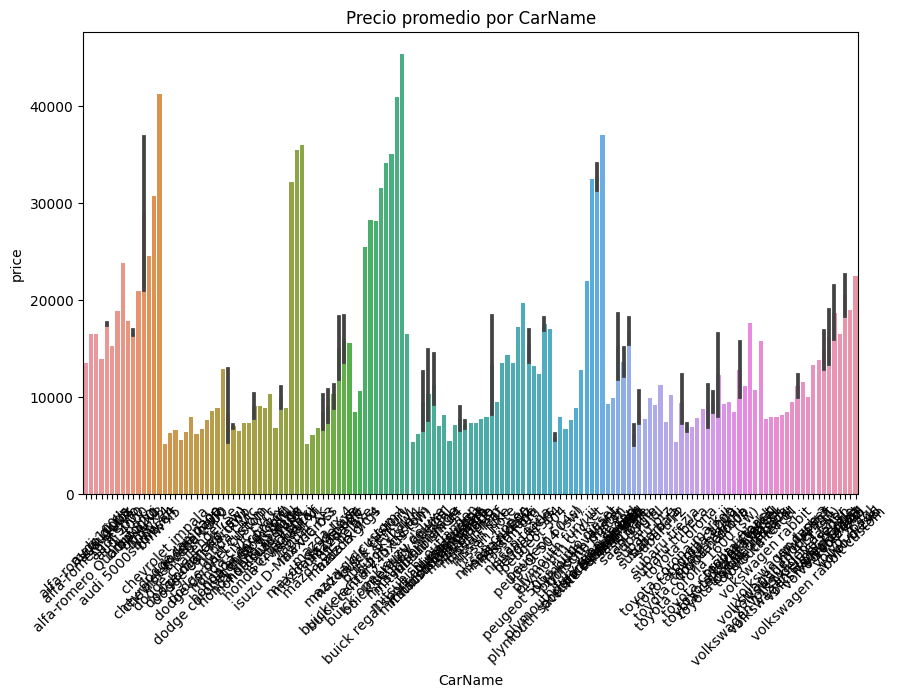

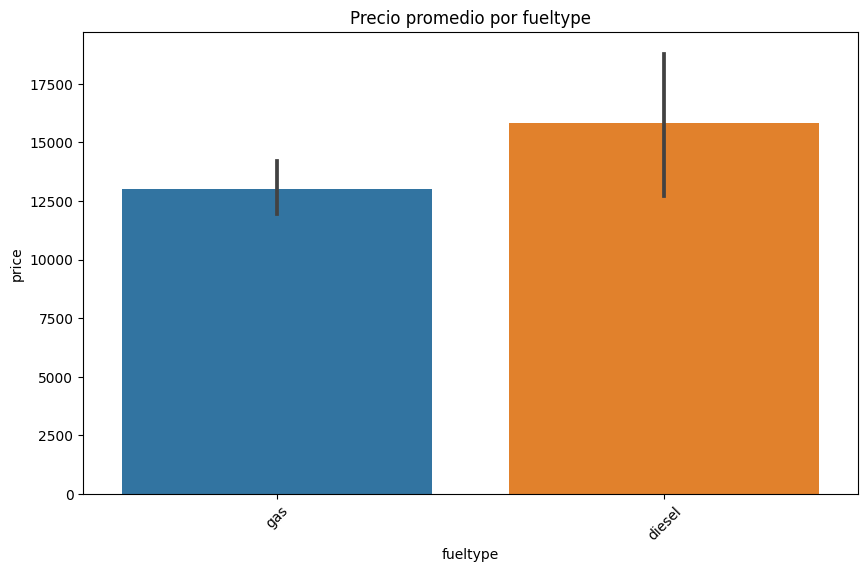

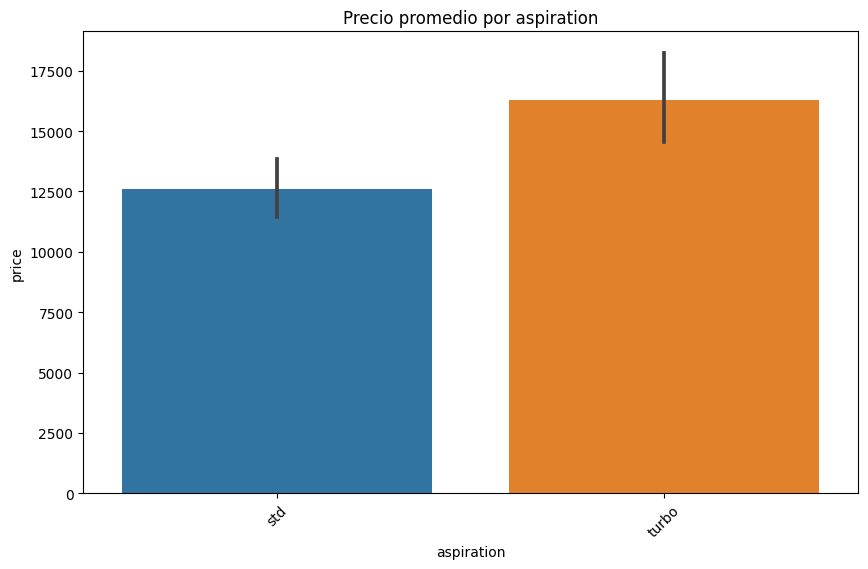

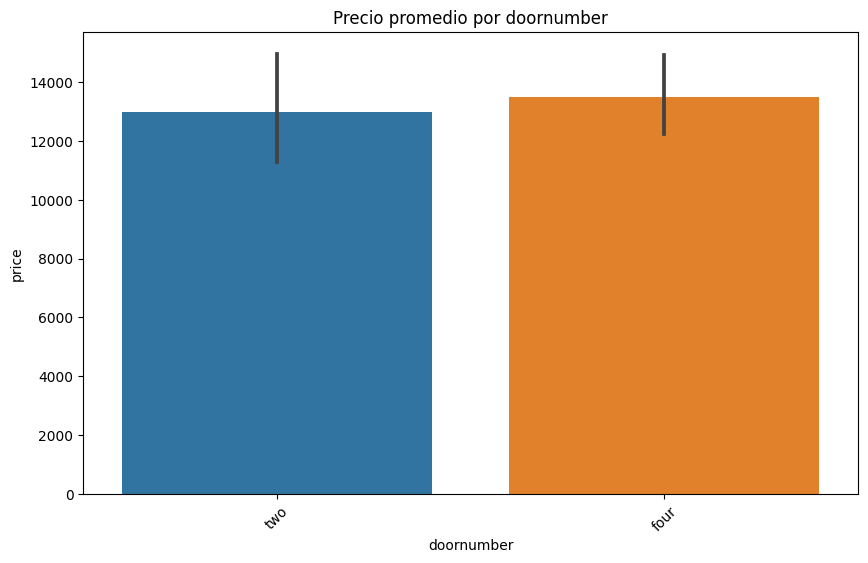

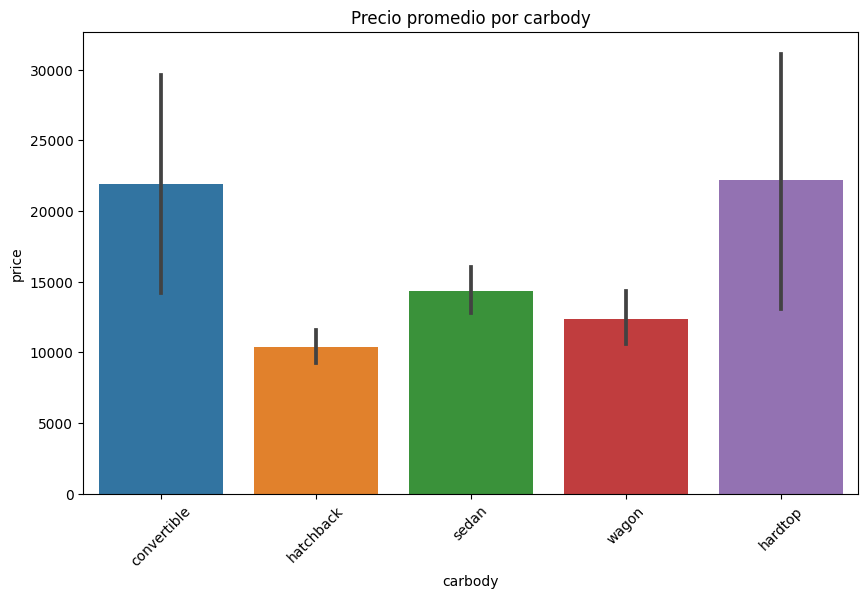

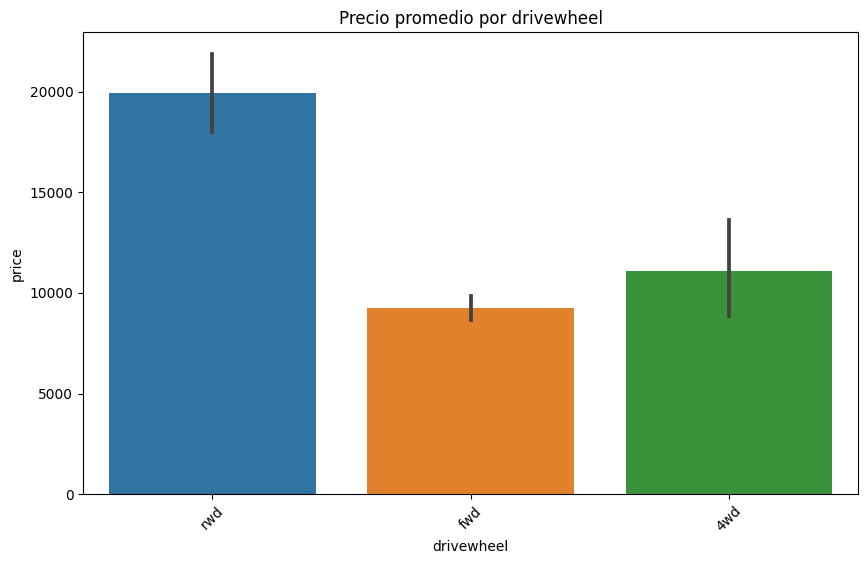

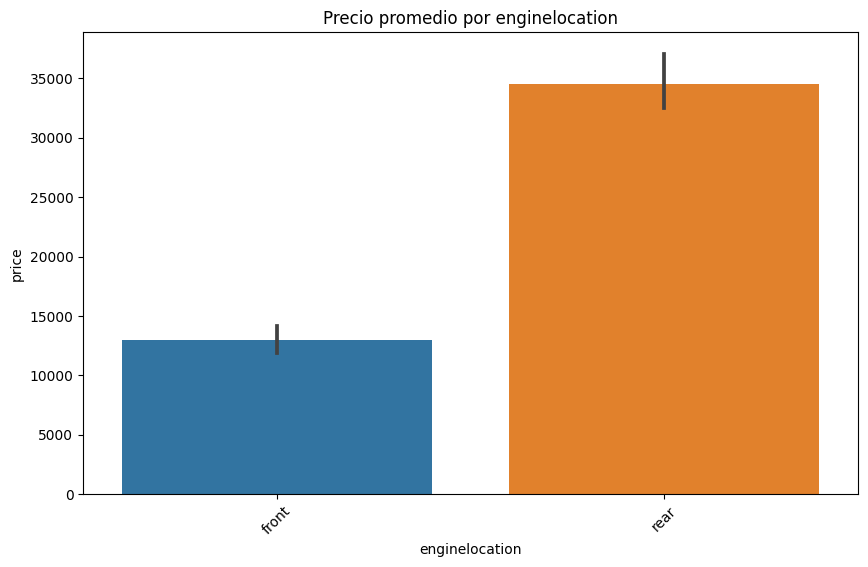

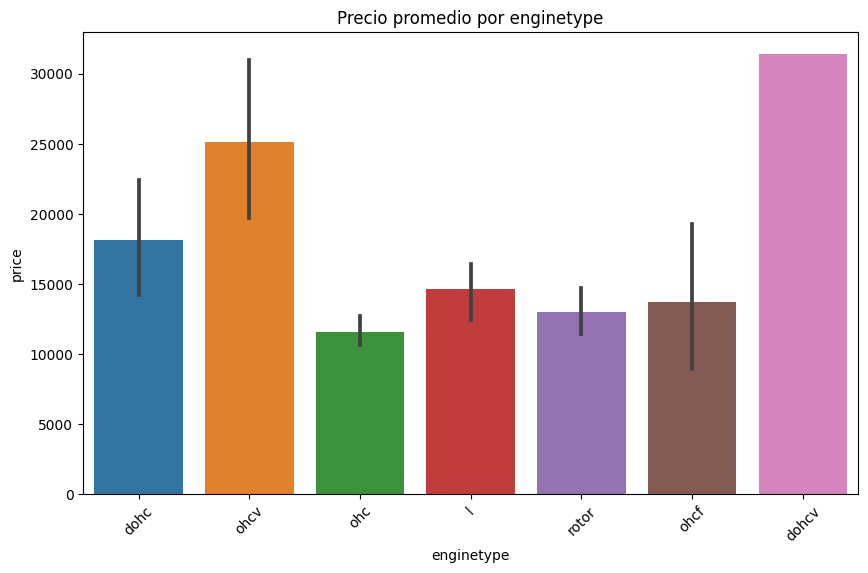

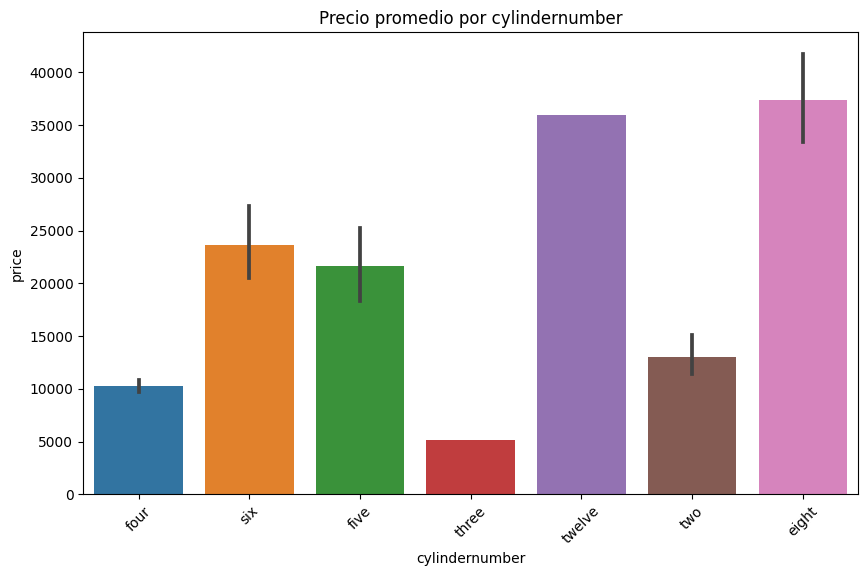

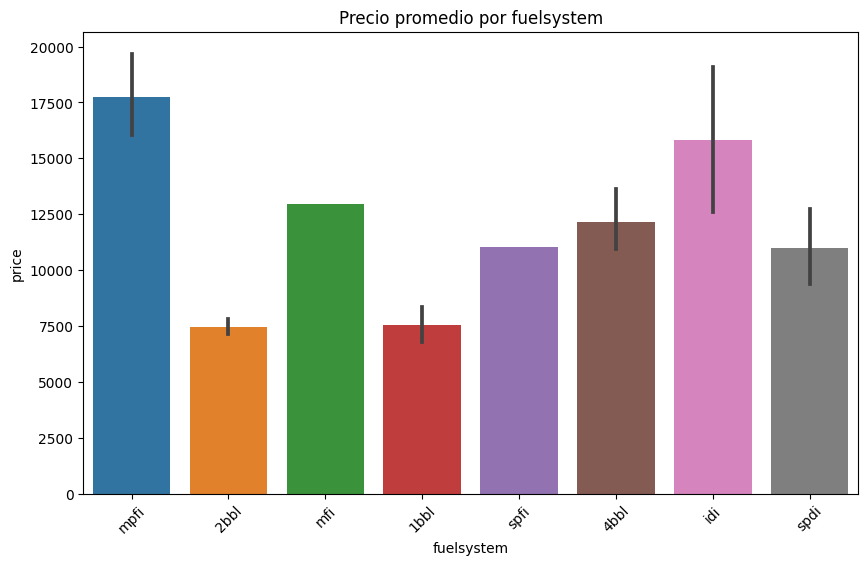

In [14]:
#Categorización por medio de boxplot
for columna_categorica in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=columna_categorica, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Precio promedio por {columna_categorica}')
    plt.show()

#Basando la información en los gráficos obtenidos, es posible ver que hay algunas gráficas que no aportan mucha información sobre el precio del auto, por ende, esas no nos darían un buen análisis de los precios, así que es fácil determinar que se pueden filtrar del análisis.

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='carbody', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Precio promedio por tipo de carrocería')
plt.show()

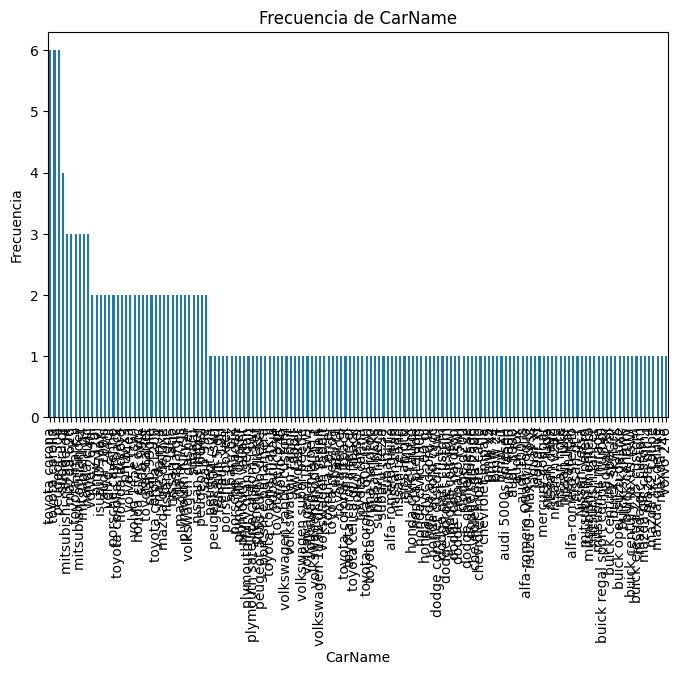

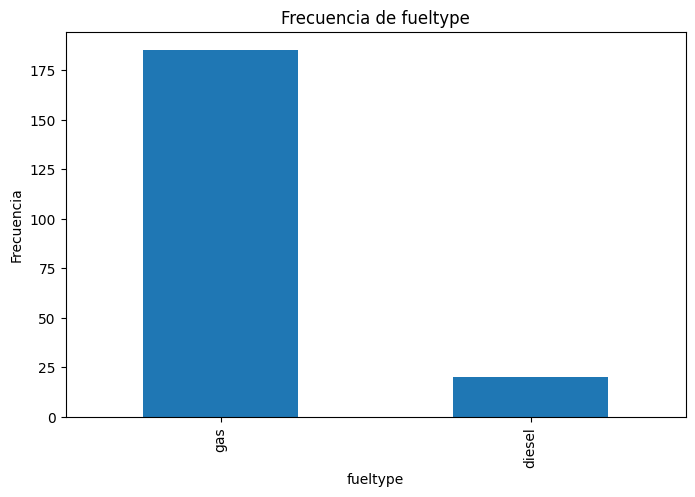

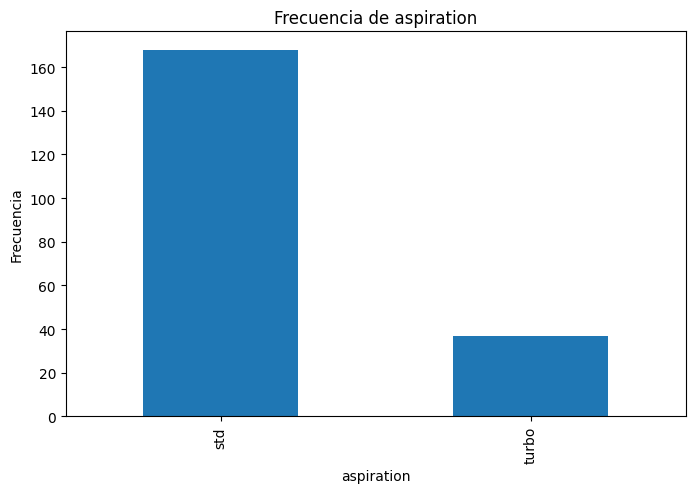

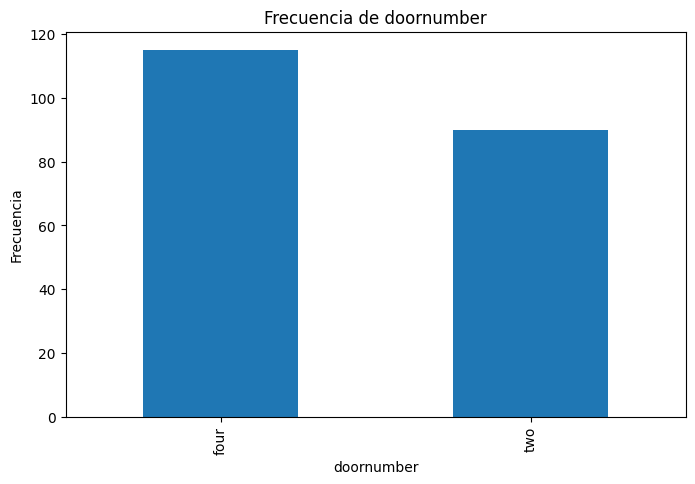

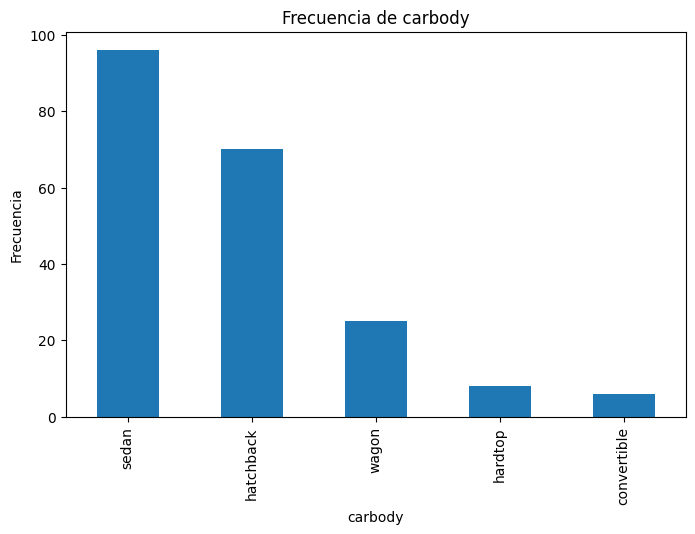

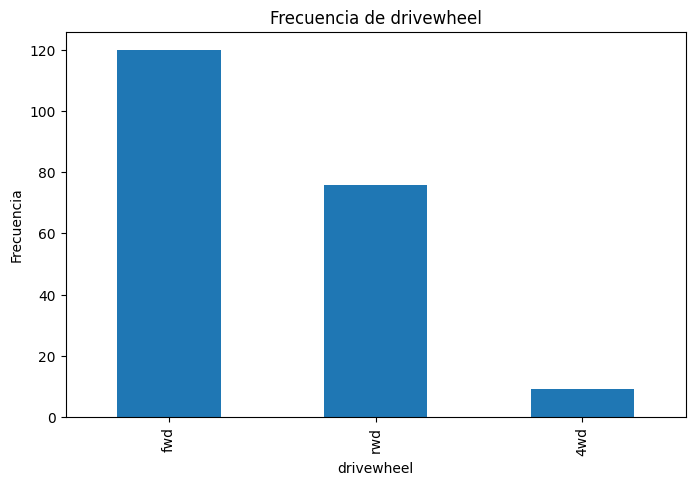

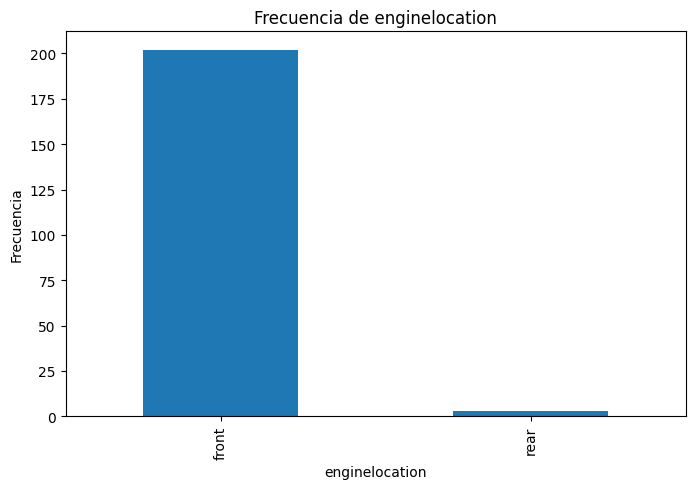

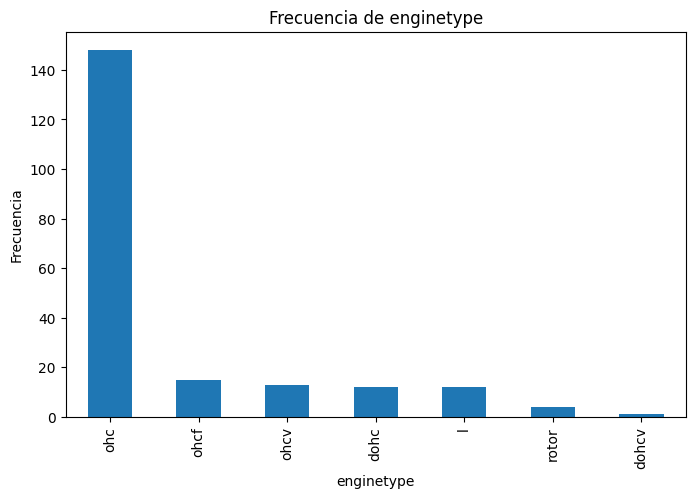

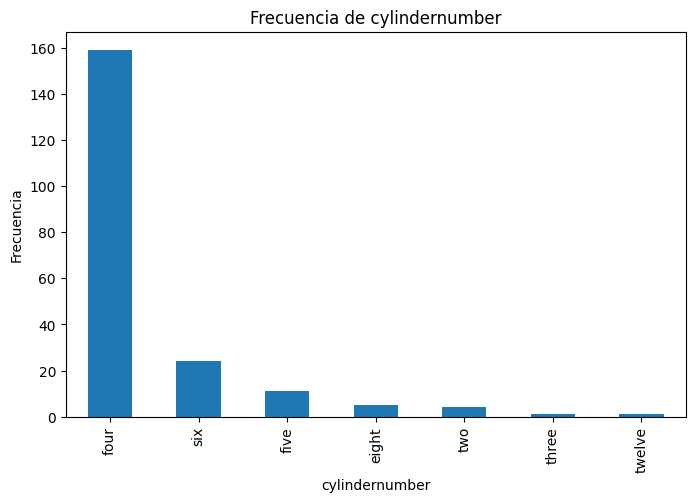

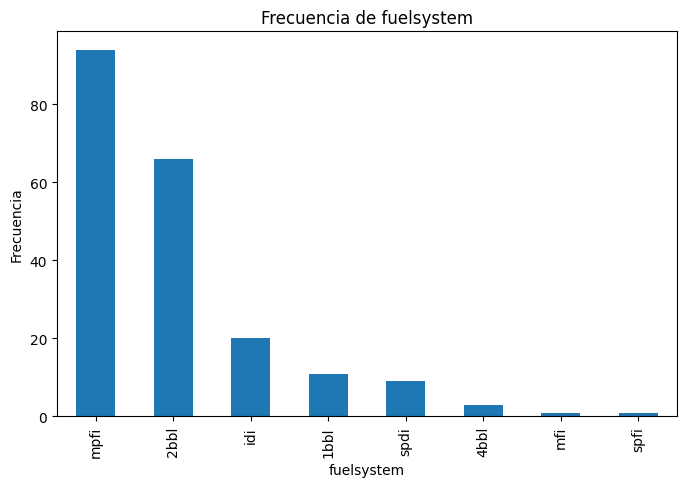

In [8]:
#Para análisis de frecuencia, aunque no sé si puede ser un buen parámetro de categorización
for columna_categorica in columnas_categoricas:
    plt.figure(figsize=(8, 5))
    df[columna_categorica].value_counts().plot(kind='bar', stacked=True)
    plt.title(f'Frecuencia de {columna_categorica}')
    plt.xlabel(columna_categorica)
    plt.ylabel('Frecuencia')
    plt.show()

#Analiza la dependencia del valor del auto como función de cada variable numerica

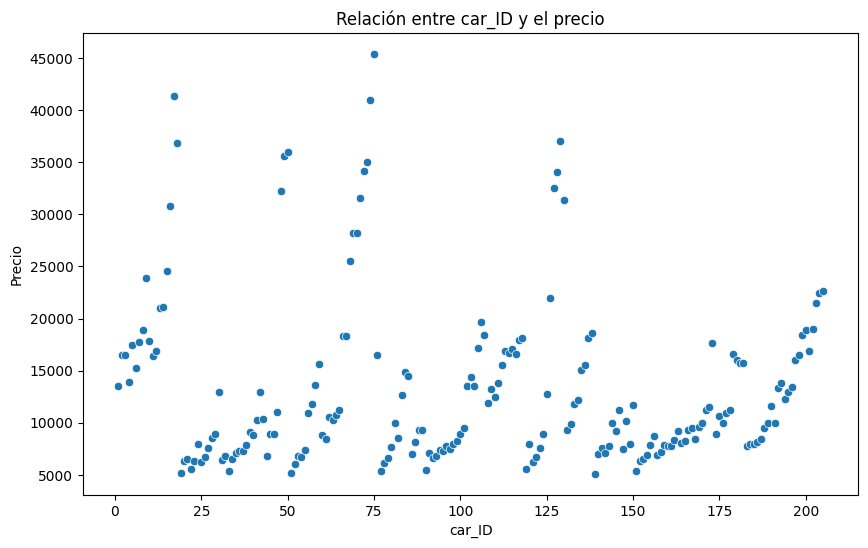

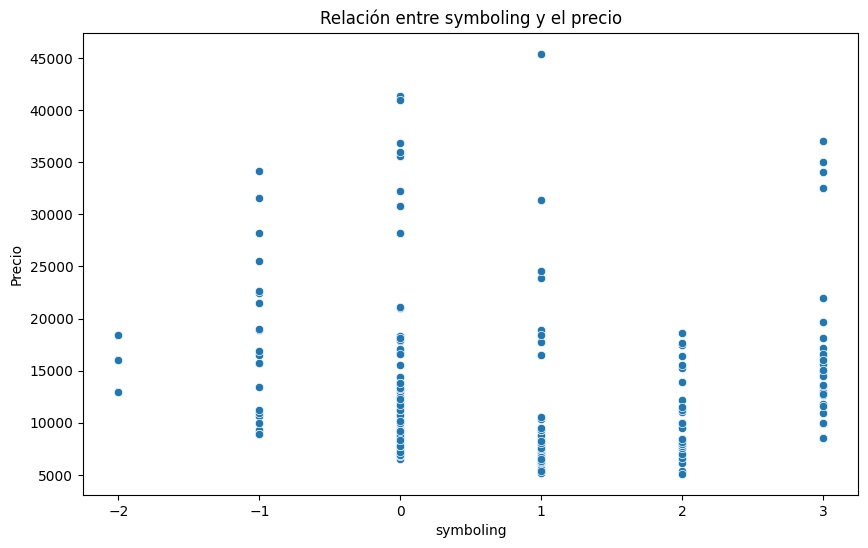

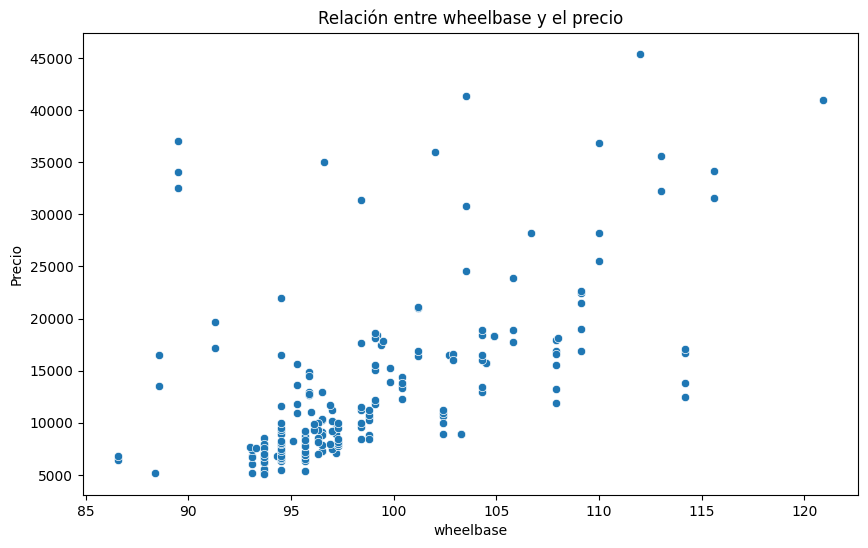

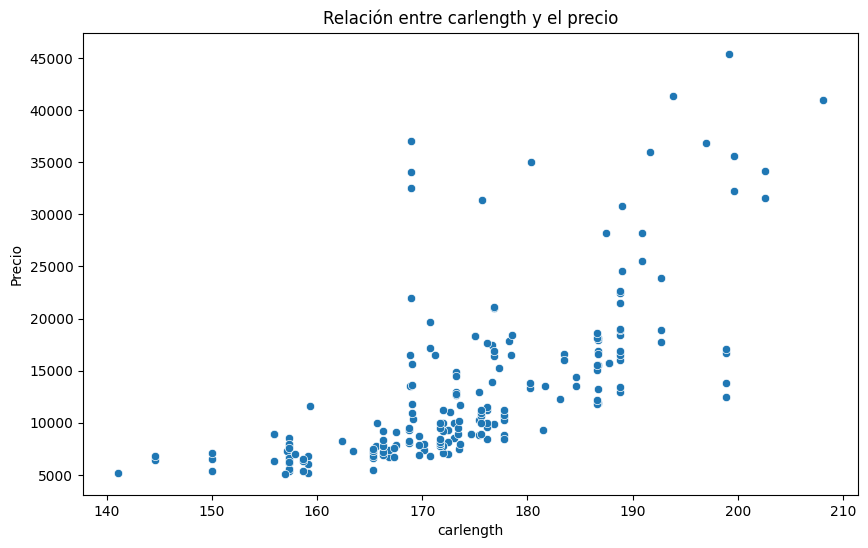

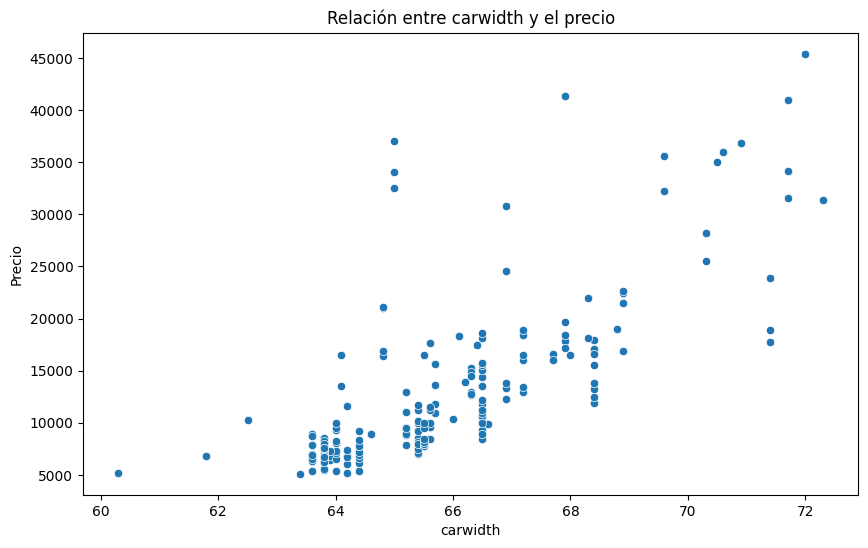

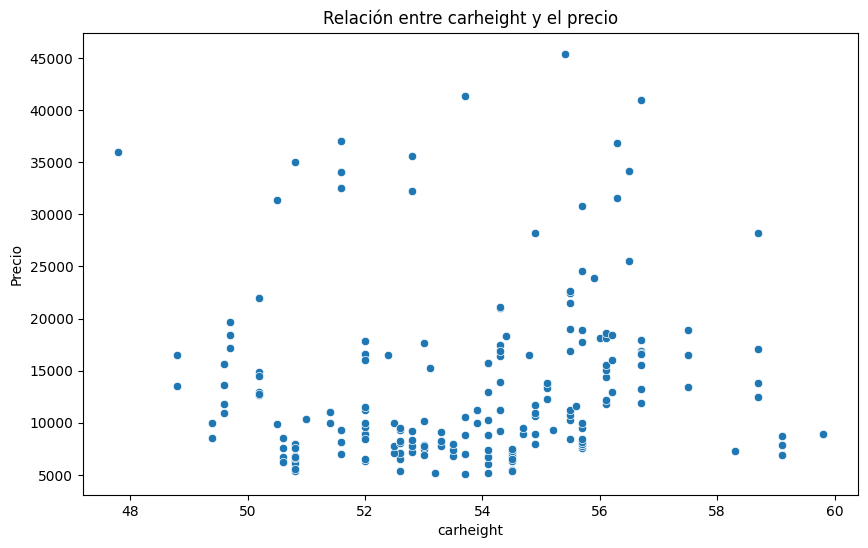

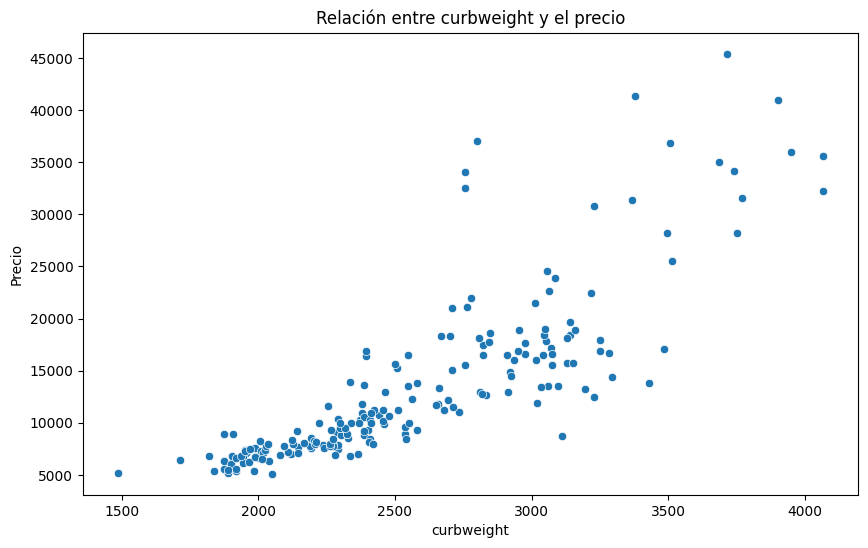

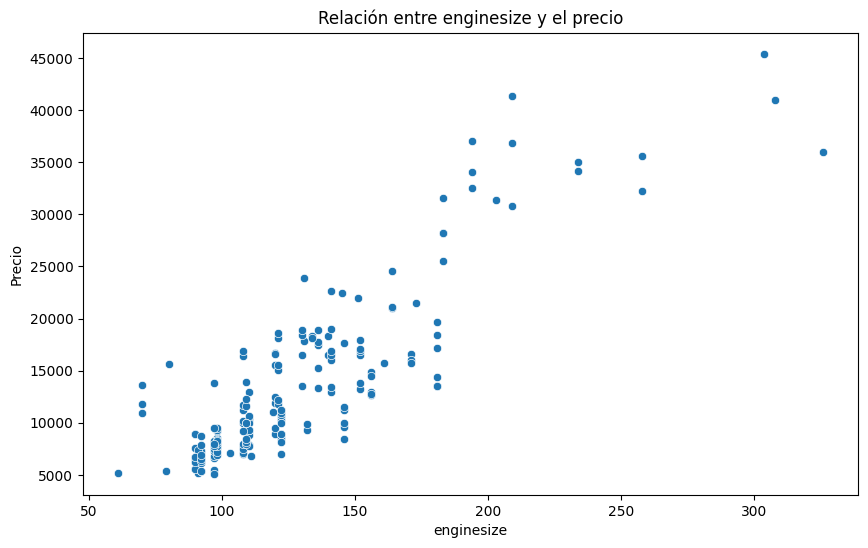

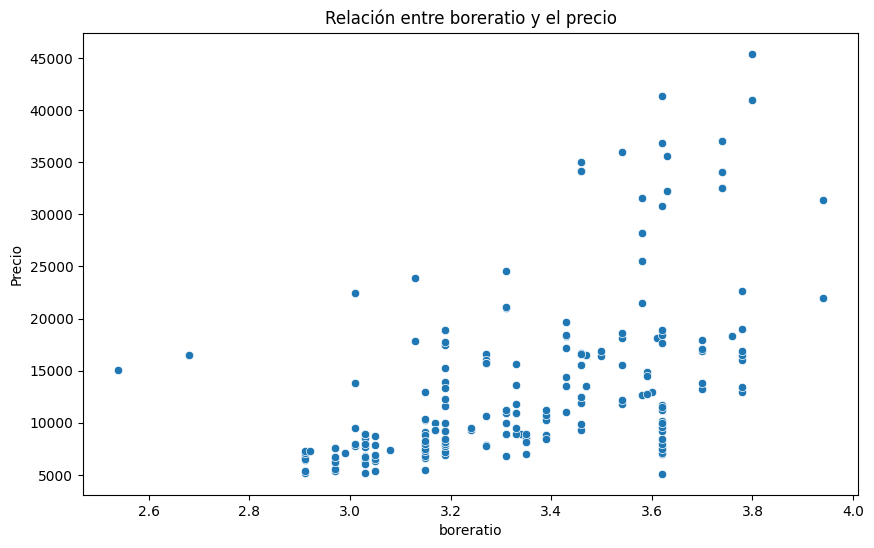

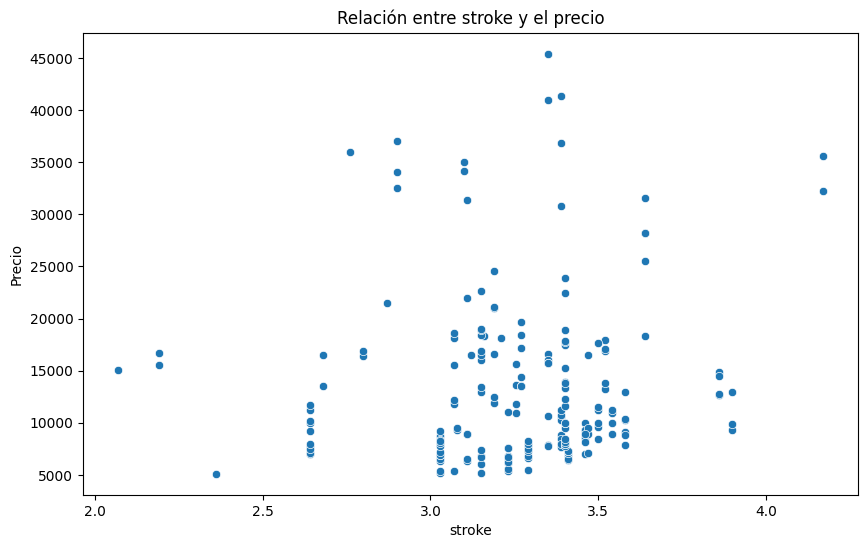

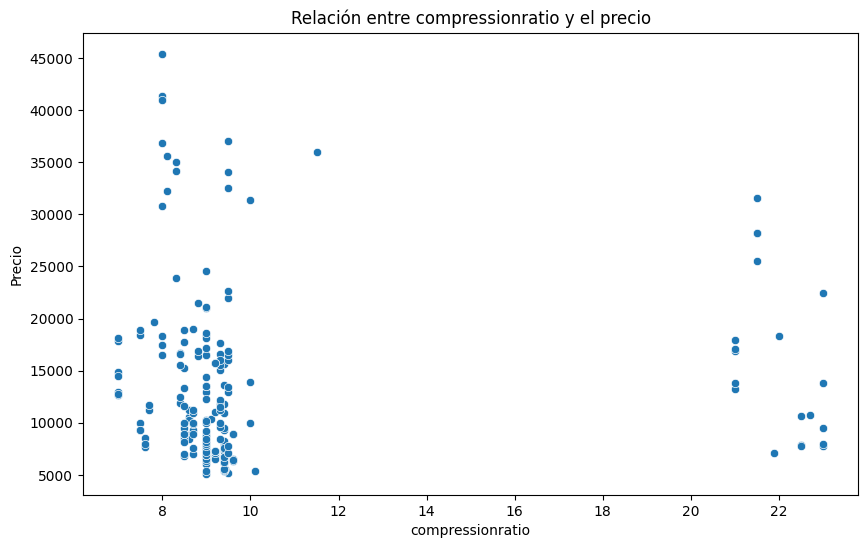

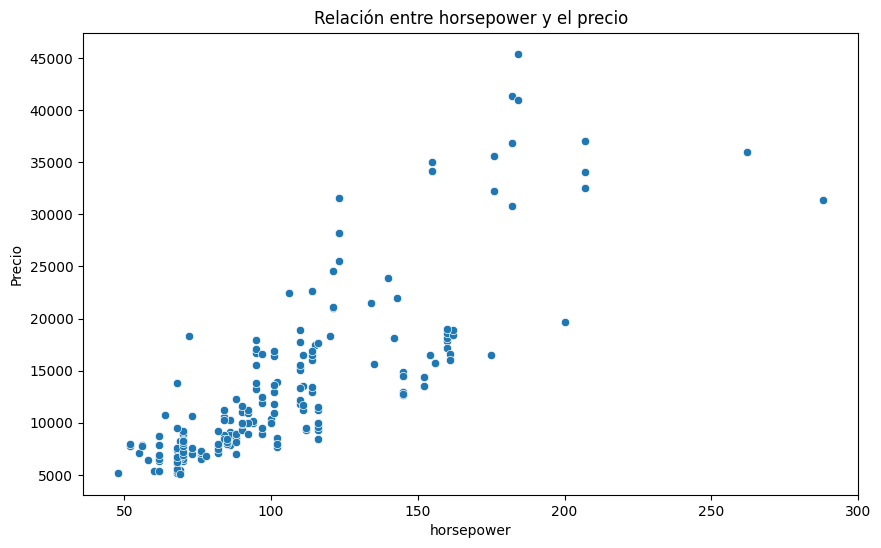

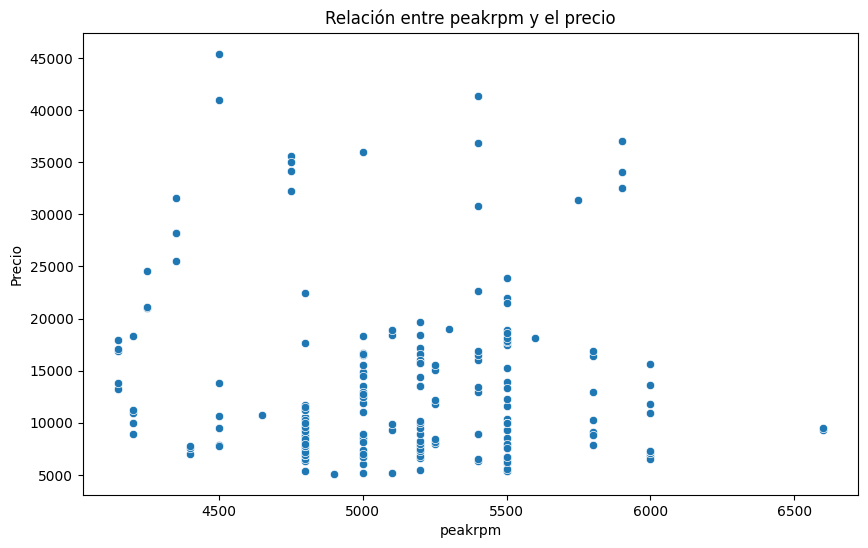

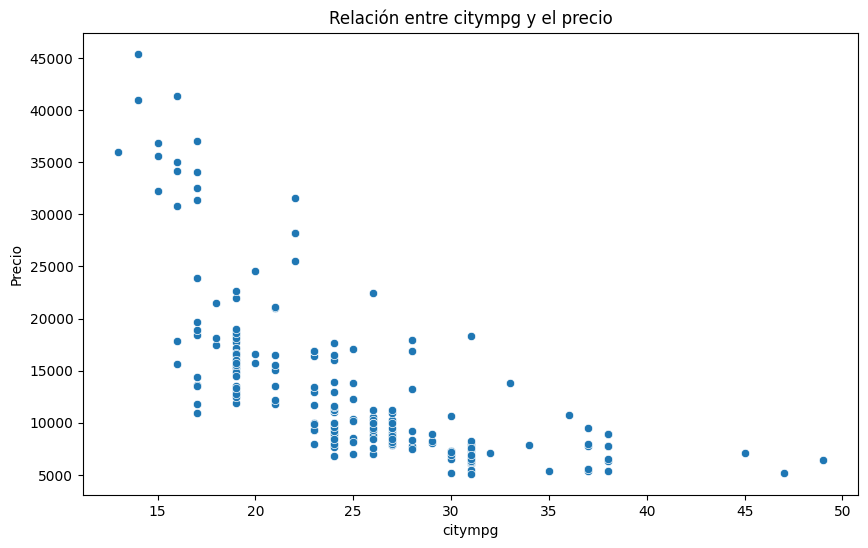

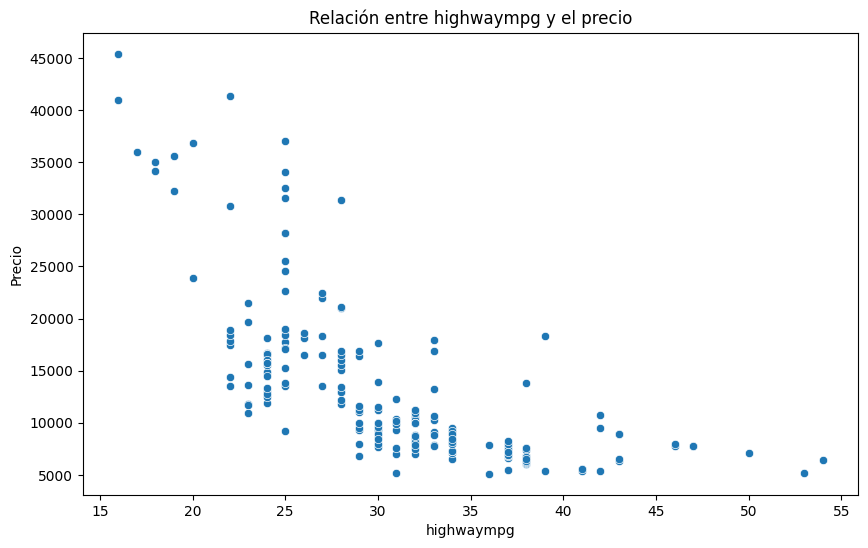

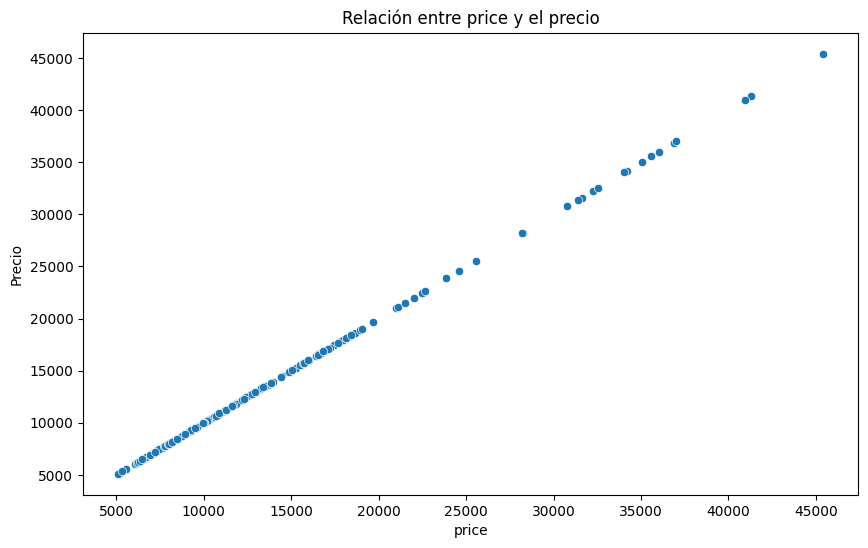

In [9]:
# Realizar un gráfico de dispersión para cada columna numérica
for columna_numerica in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=columna_numerica, y='price', data=df)
    plt.title(f'Relación entre {columna_numerica} y el precio')
    plt.xlabel(columna_numerica)
    plt.ylabel('Precio')
    plt.show()